In [6]:
import numpy as np
import cv2 
import os
import matplotlib.pyplot as plt
from pylab import *

In [7]:
def histeq(im,nbr_bins = 256):
    """对一幅灰度图像进行直方图均衡化"""
    #计算图像的直方图
    #在numpy中，也提供了一个计算直方图的函数histogram(),第一个返回的是直方图的统计量，第二个为每个bins的中间
    imhist,bins = histogram(im.flatten(),nbr_bins,normed='true')
#     plt.hist(im.flatten(), 256)#a是输入数据。b是分成几段
#     plt.show()
    cdf = imhist.cumsum()   #
    cdf = 255.0 * cdf / cdf[-1]
    #使用累积分布函数的线性插值，计算新的像素值
    im2 = interp(im.flatten(),bins[:-1],cdf)
#     plt.hist(im2, 256)#a是输入数据。b是分成几段
#     plt.show()
    return im2.reshape(im.shape),cdf

F:\Anaconda3\envs\scrapyEnv\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


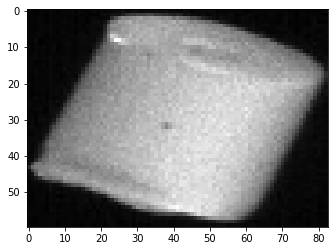

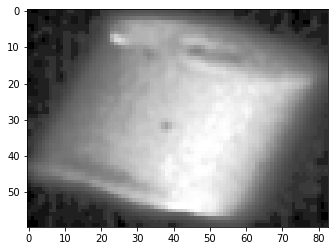

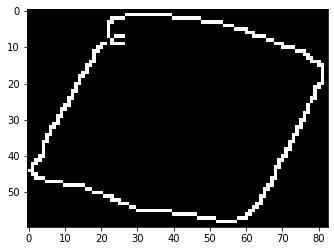

In [4]:
if os.path.exists(filename): 
    fileList = os.listdir(filename); 
    for count in range(len(fileList)): 
     img=cv2.imread(filename,0)
     img_medianblur=cv2.medianBlur(img,3)
     img_Gaussianblur=cv2.GaussianBlur(img,(3,3),0,0)
     plt.figure(figsize=(8,4))
     plt.imshow(img,cmap='gray')
     img_equilize_Gauss,cdf=histeq(img_Gaussianblur)   
     plt.figure(figsize=(8,4))
     plt.imshow(img_equilize_Gauss,cmap='gray')
     plt.show()
     img_equilize_Gauss.dtype=np.uint8
     img_canny=cv2.Canny(img,150,255)
     plt.figure(figsize=(8,4))
     plt.imshow(img_canny,cmap='gray')
     plt.show() 

[[7.44982421 1.29739522 9.68621134 8.77537554]
 [9.71260533 2.81687325 6.02060282 7.38999006]
 [9.3160596  9.9869107  1.7481061  1.89711642]]


F:\Anaconda3\envs\scrapyEnv\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


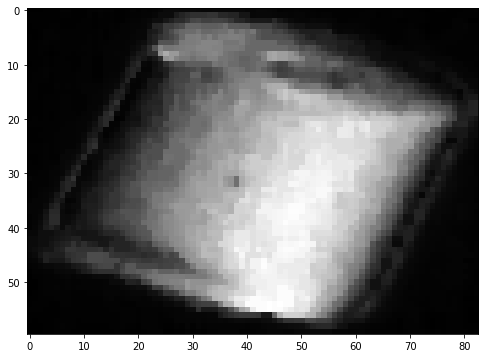

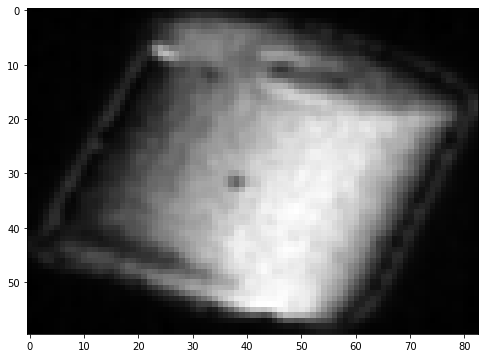

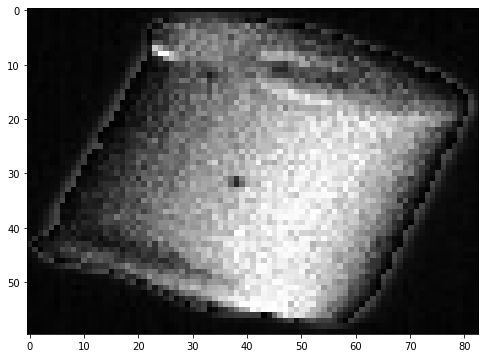

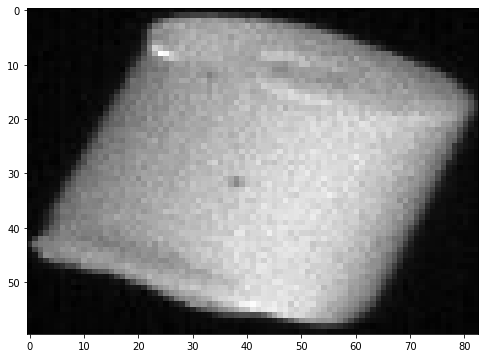

In [5]:
# plt.hist(img.flatten(), 256)#a是输入数据。b是分成几段
# plt.show()
# plt.hist(img_Gaussianblur.flatten(), 256)#a是输入数据。b是分成几段
# plt.show()
# plt.hist(img_equilize_Gauss.flatten(), 256)#a是输入数据。b是分成几段
# plt.show()

np_list=np.random.rand(3,4)*10
print(np_list)
img=cv2.imread(filename,0)
img_copy=np.copy(img)
_,img_otsu=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
rows,cols=np.where(img_otsu==255)
img_need_equaliztion=img[:,:][np.where(img_otsu>10)]
equilize_Result,cdf=histeq(img_need_equaliztion)
for i in range(len(rows)):
         img[rows[i],cols[i]]=equilize_Result[i]
img_medianblur=cv2.medianBlur(img,3)
img_Gaussianblur=cv2.GaussianBlur(img,(3,3),0,0)
plt.figure(figsize=(10,6))
plt.imshow(img_medianblur,cmap='gray')
plt.show()
plt.figure(figsize=(10,6))
plt.imshow(img_Gaussianblur,cmap='gray')
plt.show()
plt.figure(figsize=(10,6))
plt.imshow(img,cmap='gray')
plt.show()

plt.figure(figsize=(10,6))
plt.imshow(img_copy,cmap='gray')
plt.show()

